In [2]:
# pip install pymysql
import pymysql

# Connection(접속)
# 잘 기억이 나지 않는다면 show databases;
# mysql -u stest -p 비밀번호
db = pymysql.connect(
    host='127.0.0.1', 
    port=3306, 
    user='mariadb', 
    passwd='mariadb', 
    db='test'
)

cursor = db.cursor()

# SQL 문 작성
# 잘 생성되었는지 확인하기 - show tables;
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    );
"""

# SQL Query 실행(메모리상에서 완료)
cursor.execute(sql)

# 실제 DB에 적용(commit)
db.commit()

# DB 닫기
db.close()

print("Table Creation Success")

Table Creation Success


In [3]:
import pymysql

db = pymysql.connect(
    host='127.0.0.1', 
    port=3306, 
    user='mariadb', 
    passwd='mariadb', 
    db='test'
)

cursor = db.cursor()

# SQL 문 작성
sql = """
    insert into pydbtest(name, price) values (%s, %s)
"""

# SQL Query 실행(메모리상에서 완료)
cursor.execute(sql, ('Xeon', 10000000))
cursor.execute(sql, ('OpenVINO', 30000000))
cursor.execute(sql, ('Nvidia RTX Titan', 4000000))

# 실제 DB에 적용(commit)
db.commit()

# DB 닫기
db.close()

print("Insert Success")

Insert Success


In [4]:
import pymysql

db = pymysql.connect(
    host='127.0.0.1', 
    port=3306, 
    user='mariadb', 
    passwd='mariadb', 
    db='test'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

# Query를 실행한 이후 정보를 cursor가 가지고 있고
# fetch를 통해서 실제 값을 얻어와야 한다.
cursor.execute(sql)
rows = cursor.fetchall()  # select로 얻은 데이터 전부
print(rows)

# db.commit()은 실제 DB에 적용할 변경된 사항이 있을 경우에만 필요하다.
db.close()

print("Select Success")

((1, 'Xeon', 10000000), (2, 'OpenVINO', 30000000), (3, 'Nvidia RTX Titan', 4000000))
Select Success


In [5]:
import pymysql

db = pymysql.connect(
    host='127.0.0.1', 
    port=3306, 
    user='mariadb', 
    passwd='mariadb', 
    db='test'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

rows = cursor.fetchall()
for row in rows:
    print(row)

db.close()

print("Select Success")

(1, 'Xeon', 10000000)
(2, 'OpenVINO', 30000000)
(3, 'Nvidia RTX Titan', 4000000)
Select Success


In [6]:
import pymysql

db = pymysql.connect(
    host='127.0.0.1', 
    port=3306, 
    user='mariadb', 
    passwd='mariadb', 
    db='test'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

rows = cursor.fetchall()
for row in rows:
    print(row)
    print(row['id'], row['name'], row['price'])

db.close()

print("Select Success")

{'id': 1, 'name': 'Xeon', 'price': 10000000}
1 Xeon 10000000
{'id': 2, 'name': 'OpenVINO', 'price': 30000000}
2 OpenVINO 30000000
{'id': 3, 'name': 'Nvidia RTX Titan', 'price': 4000000}
3 Nvidia RTX Titan 4000000
Select Success


In [7]:
import json

customer = {
    'id': 3737,
    'name': 'Rubric',
    'history': [
        {'date': '1999-03-12', 'item': 'PC'},
        {'date': '2019-12-23', 'item': 'Notebook'}
    ]
}

jsonStr = json.dumps(customer)

print(jsonStr)
print(type(jsonStr))

{"id": 3737, "name": "Rubric", "history": [{"date": "1999-03-12", "item": "PC"}, {"date": "2019-12-23", "item": "Notebook"}]}
<class 'str'>


In [8]:
dict = json.loads(jsonStr)

print(dict['id'])
print(dict['name'])

for info in dict['history']:
    print(info['date'], ':', info['item'])

3737
Rubric
1999-03-12 : PC
2019-12-23 : Notebook


In [1]:
import csv

# 'r'은 read라는 의미
# 'fd = File Descriptor'의 약자
# 리눅스와 유닉스(맥)의 핵심 철학 == 모든 것은 파일이다.
fd = open('low-voltage-bom.csv', 'r', encoding='utf-8')

readIO = csv.reader(fd)

for line in readIO:
    print(line)
    
fd.close()

['Ref', 'Package', 'Qty', 'Value', 'Digikey part number', 'Manufacturer part number']
['BT1', 'BatteryHolder_Keystone_2481_4xAAA', '1', 'Battery', '36-2481-ND', '2481']
['C10,C9,C1', 'CP_Radial_D5.0mm_P2.00mm', '3', '10uF', '732-8856-1-ND', '860020672010']
['C11', 'C_Disc_D3.8mm_W2.6mm_P2.50mm', '1', '47000pF', 'BC5153-ND', 'K473K15X7RF53L2']
['C13,C12', 'CP_Radial_D6.3mm_P2.50mm', '2', '220uF', '732-8634-1-ND', '860010473011']
['C3', 'C_Disc_D5.0mm_W2.5mm_P5.00mm', '1', '100pF', 'BC5223CT-ND', 'K101J10C0GF5UH5']
['C5', 'CP_Radial_D5.0mm_P2.00mm', '1', '1uF', '732-8851-1-ND', '860020672005']
['C6,C4', 'C_Disc_D5.0mm_W2.5mm_P5.00mm', '2', '1000pF', 'BC2659CT-ND', 'K102K10X7RF5UH5']
['C8,C7,C2', 'C_Disc_D5.1mm_W3.2mm_P5.00mm', '3', '0.1uF', '478-2472-ND', 'SR215C104KAA']
['D1', 'D_DO-35_SOD27_P7.62mm_Horizontal', '1', 'BAT41', '497-2493-1-ND', 'BAT41']
['D2', 'LED_D5.0mm_Horizontal_O1.27mm_Z9.0mm', '1', 'LED', 'C5SMF-RJF-CT0W0BB1-ND', 'C5SMF-RJF-CT0W0BB1']
['J1', 'MOLEX_0731713150', '1',

In [2]:
import csv

fd = open('test.csv', 'w', encoding='utf-8', newline='')

writeIO = csv.writer(fd)

# 위에 만든 예제들을 응용하면
# DB상에서 데이터를 가져와서 혹은 웹에서 데이터를 가져와서
# 엑셀 파일을 만들 수 있다.
writeIO.writerow([1, 'Intel', False])
writeIO.writerow([2, 'AMD', True])

fd.close()

In [3]:
fd = open('low-voltage-bom.csv', 'r', encoding='utf-8')

readIO = csv.reader(fd)

for line in readIO:
    print(line)
    
fd.close()

['Ref', 'Package', 'Qty', 'Value', 'Digikey part number', 'Manufacturer part number']
['BT1', 'BatteryHolder_Keystone_2481_4xAAA', '1', 'Battery', '36-2481-ND', '2481']
['C10,C9,C1', 'CP_Radial_D5.0mm_P2.00mm', '3', '10uF', '732-8856-1-ND', '860020672010']
['C11', 'C_Disc_D3.8mm_W2.6mm_P2.50mm', '1', '47000pF', 'BC5153-ND', 'K473K15X7RF53L2']
['C13,C12', 'CP_Radial_D6.3mm_P2.50mm', '2', '220uF', '732-8634-1-ND', '860010473011']
['C3', 'C_Disc_D5.0mm_W2.5mm_P5.00mm', '1', '100pF', 'BC5223CT-ND', 'K101J10C0GF5UH5']
['C5', 'CP_Radial_D5.0mm_P2.00mm', '1', '1uF', '732-8851-1-ND', '860020672005']
['C6,C4', 'C_Disc_D5.0mm_W2.5mm_P5.00mm', '2', '1000pF', 'BC2659CT-ND', 'K102K10X7RF5UH5']
['C8,C7,C2', 'C_Disc_D5.1mm_W3.2mm_P5.00mm', '3', '0.1uF', '478-2472-ND', 'SR215C104KAA']
['D1', 'D_DO-35_SOD27_P7.62mm_Horizontal', '1', 'BAT41', '497-2493-1-ND', 'BAT41']
['D2', 'LED_D5.0mm_Horizontal_O1.27mm_Z9.0mm', '1', 'LED', 'C5SMF-RJF-CT0W0BB1-ND', 'C5SMF-RJF-CT0W0BB1']
['J1', 'MOLEX_0731713150', '1',

In [13]:
# pip install Flask
#pip install flask
from flask import Flask

app = Flask(__name__)

@app.route('/')
@app.route('/index')
def index():
    return "Hello Python Web Programming"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jun/2020 10:57:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jun/2020 10:57:43] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
from flask import Flask

app = Flask(__name__)

user = {'nickname': 'FPGA'}

# HTML Tag가 많이 들어가고 자바스크립트가 연동되기 시작하면
# Flask 보다는 DJango를 추천한다.
# 왜냐하면 그때부터는 <% ~~~ %> 이런 것들을 남발해야 하기 때문
# 하지만 단순히 Restful API Server를 만든다면 Flask가 더 편하다.
@app.route('/')
@app.route('/index')
def index():
    """Index View HTML Ready ? Go!"""
    return """
        <html>
            <head>
                <title>Python Flask Web</title>
            </head>
            <body>
                <h1>Hello, """ + user['nickname'] + """<h1>
            </body>
        </html>
    """

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jun/2020 11:06:46] "GET / HTTP/1.1" 200 -


In [13]:
from flask import Flask
from flask import render_template

app = Flask(__name__)

user = {'nickname': 'FPGASDR'}
posts = [
    {
        'author': {'nickname': 'SHL'},
        'body': 'FPGA Go Go Go'
    },
    {
        'author': {'nickname': 'Susan'},
        'body': 'I love summer'
    },
]

@app.route('/')
@app.route('/index')
def index():
    # render_template은 HTML을 뿌리고 싶은 경우 사용함
    # 보통 RESTFUL API 서버는 json을 return하므로 필요 없음
    # 그래서 Flask가 RESTFUL API 서버로는 상당히 괜찮다.
    return render_template('index.html', title = 'Web', user = user, posts = posts)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
# Spring이 Python에게 요청하는 RESTFUL API Server를 만들어보자!
from flask import Flask, jsonify
# pip install jsonify

import requests
import json

# pip install flask_restful
from flask_restful import Resource, Api, reqparse

# Flask 서버를 준비
app = Flask(__name__)
# RESTFUL 처리 준비
api = Api(app)

@app.route('/dataServer')
def PythonServerResponse():
    print("It's operate");
    summary = {'name': 'Hello', 'major': 'C++'}
    return jsonify(summary)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [3]:
import pymysql
import numpy as np
import calendar
import datetime
import time
import math

# 가우시안(정규) 분포를 따르는 랜덤 변수 10000개 생성
sampleTime = np.arange(0, 10, 0.001)
noiseData = np.random.normal(size = len(sampleTime))

# 초기 위상 60도를 기준으로한 신호, 일반 신호와
# 노이즈 신호의 합성으로 구성된 전압 함수
voltage = 3 * np.cos(10 * sampleTime + (math.pi / 3)) + \
        2.7 * np.cos(7 * sampleTime) + \
        2.5 * np.cos(5 * noiseData * sampleTime)

# 새로운 가우시안 랜덤을 10000개 생성한다.
noiseData = np.random.normal(size = len(sampleTime))

# 동일한 함수를 작성하되 위상 60도를 밀어둔 것을 제거한다.
current = 3 * np.cos(10 * sampleTime + (math.pi / 3)) + \
        2.7 * np.cos(7 * sampleTime) + \
        2.5 * np.cos(5 * noiseData * sampleTime)

# 파이썬을 이용하여 실제 시간을 구해온다.
# 아래의 100을 곱함으로써 0.1초 단위로 센서 정보를 수집하게 된다.
ts = calendar.timegm(time.gmtime())
ts = (sampleTime * 100) + ts

# MySQL DB에 저장하기 위해 데이터 타입을 float32로 맞춰줌
# (파이썬은 디폴트 float64, int64이기 때문에 반드시 타입을 변환해줘야 한다.)
sampleTime = np.array(sampleTime, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

currTime = []

# 실제 MySQL에 저장할 수 있는 '연 월 일 시간 분 초' 형태로 변환하는 작업
for i in range(len(sampleTime)):
    currTime.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
    
# 위에서 샘플링한 정보들을 DB에 넣을 준비를 한다.
db = pymysql.connect(
    host='127.0.0.1', 
    port=3306, 
    user='mariadb', 
    passwd='mariadb', 
    db='test'
)

cursor = db.cursor()

sql = """
    insert into sensor_data(voltage, current, vendor, name, reg_date)
    values (%s, %s, %s, %s, %s)
"""

# 실무에서는 DB 서버와의 통신에서 문제가 발생할 수도 있다.
# 만약 이때 DB와의 연결 세션이 끊어지지 않아 유지된다면
# 서버 자체가 뻗어버리거나 데이터가 대규모로 손실되는 문제가 발생할 수 있다.
# 그렇기 때문에 DB 자체에 접근하여 값을 수정하는 작없에는
# 반드시 아래와 같이 try: 를 사용하여 예외처리를 해줘야한다.
try:
    with db.cursor() as cursor:
        for i in range(len(sampleTime)):
            cursor.execute(sql, 
                           (str(voltage[i]), str(current[i]), 'FMFire', 'F33N21BTN7', currTime[i]))
            
        db.commit()
finally:
    # 만약 위쪽의 Query 작업에 문제가 발생하더라도
    # 안정적으로 DB세션을 해제해주기 위한 코드
    db.close()
    
print("Success to insert 10000 Sensor Data")

# create table sensor_data(
#         no int not null auto_increment primary key, 
#         voltage float not null, 
#         current float not null, 
#         vendor text null, 
#         name text not null, 
#         reg_date timestamp not null default now()
# );

Success to insert 10000 Sensor Data


C:\Users\201621238\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


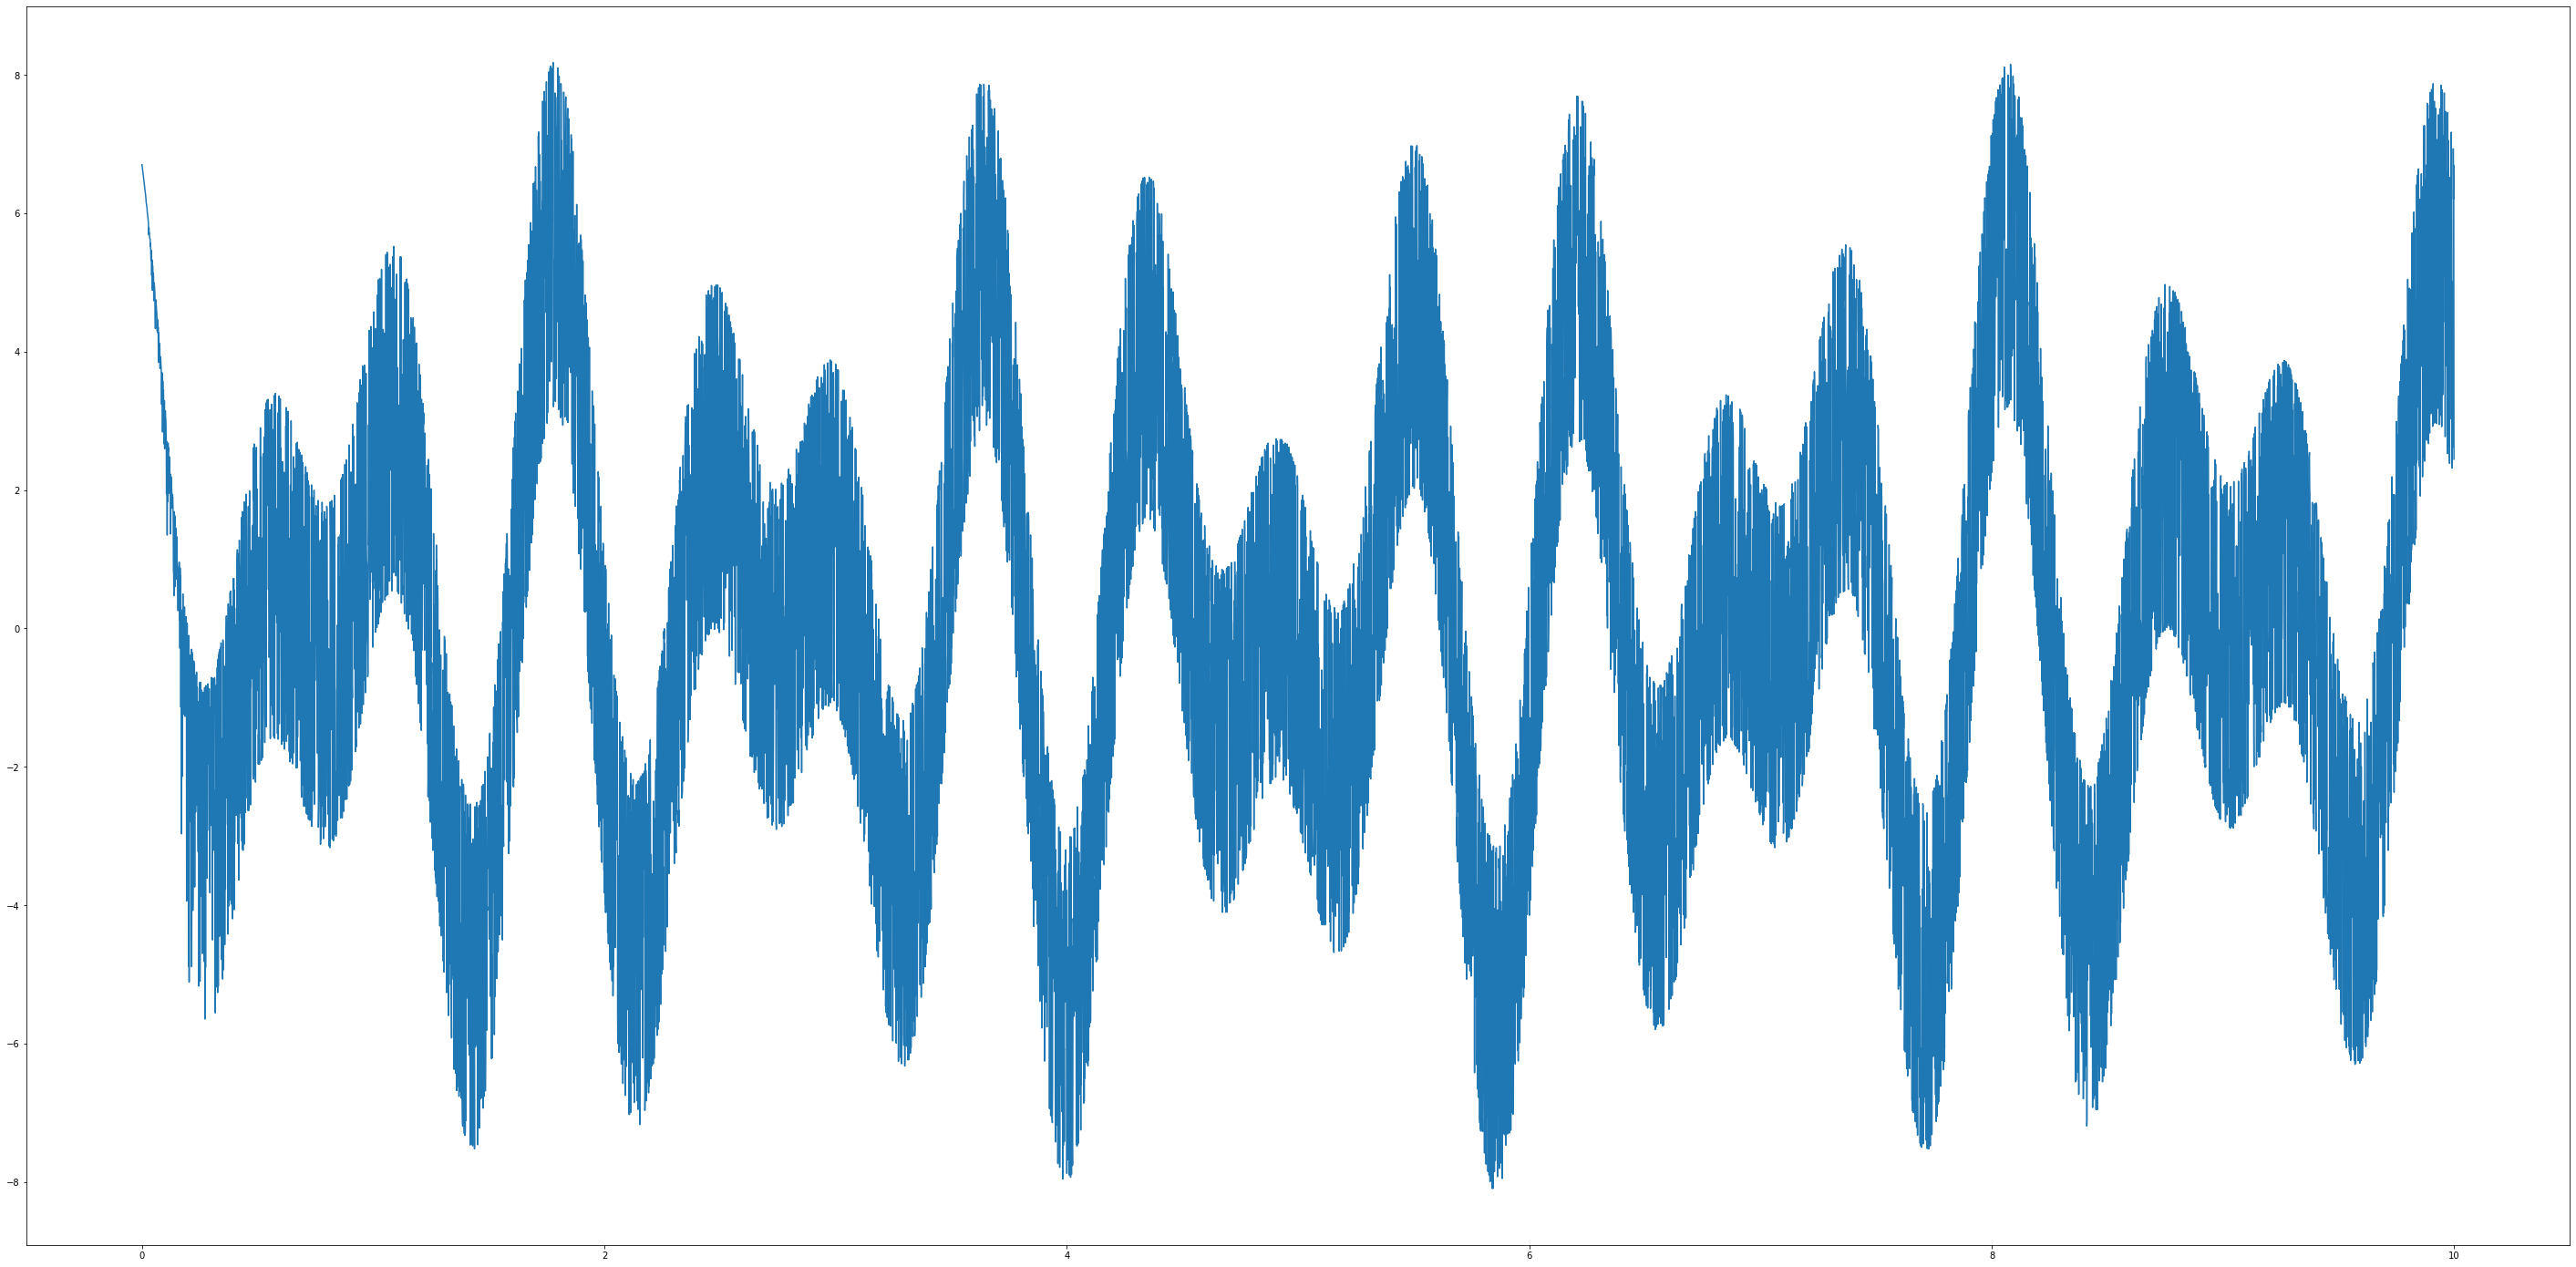

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (50, 25))
ax.plot(sampleTime, voltage)
fig.show()